<a href="https://colab.research.google.com/github/acardoco/hackaton_nuwe_v3/blob/main/Andr%C3%A9s_Cardoso_hackatonDS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retos individuales:

*    Hackathon: HACK THAT STARTUP 3
*    Author: Andrés Cardoso Cordero
 

Steps:

1. Analizar el conjunto de datos
2. Normalizar datos y aplicar filtros que hagan falta
3. Dividir en entrenamiento/testeo
4. Probar Algoritmos, implementar grid search para F1-Score 
5. Ensemble y resultado final



In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving asteroid_types.csv to asteroid_types (1).csv


In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import io
  
df = pd.read_csv(io.BytesIO(uploaded['asteroid_types.csv'])) 
df.columns

Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Classification'],
      dtype='object')

# 1. Analizar el conjunto de datos

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Classification
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.001511,-0.013060,0.008257,0.707124,0.873520,0.008531,2.775000
std,0.988149,0.982257,0.974719,1.191548,0.937349,1.313270,0.612015
min,-3.424463,-3.671441,-3.196257,-4.686986,-3.479527,-3.420182,0.000000
25%,-0.663821,-0.639263,-0.640503,0.053565,0.325542,-0.997193,3.000000
50%,0.021062,-0.022352,0.003777,0.827173,0.901551,-0.415309,3.000000
75%,0.671152,0.630646,0.665473,1.464697,1.470986,0.997545,3.000000
max,3.390360,3.333229,3.375086,4.654234,4.631273,4.819340,3.000000


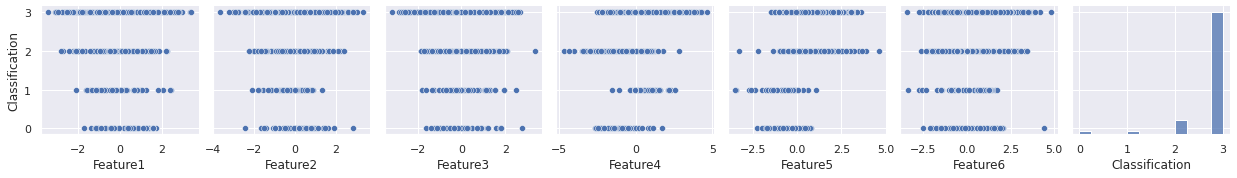

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#scatterplot
sns.set()
cols = df.columns
sns.pairplot(df[cols], size = 2.5, y_vars=['Classification'])
plt.show();

# 

Desbalanceo considerable, muchas instancias pertenencen a las **clase 3**

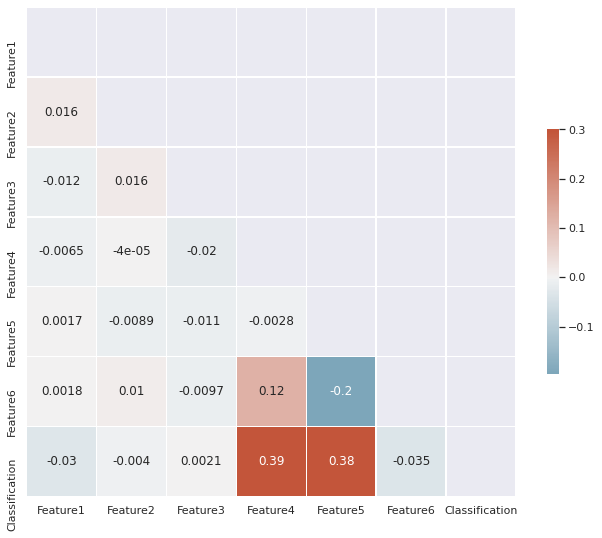

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

La matriz anterior muestra que las variables que más repercuten en el tipo de asteroide son la **Features 4 y 5**. El resto poco "aportan".

# 2. Normalizar datos y aplicar filtros que hagan falta

In [ ]:
df.iloc[:, :-1].head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,0.015724,-1.383637,0.821846,1.314887,-0.071768,2.342294
1,0.146700,0.778094,0.486682,-0.697206,0.047063,0.651647
2,0.012067,1.299313,0.047187,0.752812,0.898408,0.835497
3,-0.847860,0.262294,-0.162009,1.095407,0.549862,1.515246
4,1.286735,1.907767,-0.380351,-0.145083,0.111280,-0.076647


Voy a **normalizar las Features** *texto en cursiva* de tal forma que sus valores queden entre 0 y 1.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.iloc[:, :-1])
df_normalized = pd.DataFrame(x_scaled)
df_normalized['Classification'] = df.Classification.values
df_normalized.columns = df.columns
df_normalized.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Classification
0,0.504810,0.326611,0.611458,0.642515,0.420151,0.699370,3
1,0.524029,0.635224,0.560455,0.427116,0.434802,0.494183,2
2,0.504273,0.709634,0.493574,0.582343,0.539766,0.516496,3
3,0.378088,0.561587,0.461739,0.619019,0.496793,0.598994,3
4,0.691316,0.796498,0.428513,0.486222,0.442719,0.405792,0


In [ ]:
df_normalized.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Classification
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.502724,0.522277,0.487650,0.577452,0.536698,0.416130,2.775000
std,0.145000,0.140229,0.148329,0.127558,0.115568,0.159387,0.612015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.405094,0.432880,0.388924,0.507487,0.469136,0.294069,3.000000
50%,0.505593,0.520951,0.486968,0.590304,0.540154,0.364690,3.000000
75%,0.600986,0.614174,0.587662,0.658552,0.610361,0.536163,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# 3. Dividir en train, validacion y testeo

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Primero obtenemos el conjunto de testeo. Dejo un conjunto de datos "original" por si quiero hacer kffolds automaticos
x_train_original, x_test, y_train_original, y_test = train_test_split(df_normalized.iloc[:, :-1], df_normalized.Classification,
                                                    test_size=0.15,
                                                    random_state=0,
                                                    stratify=df_normalized.Classification)
# a partir del train anterior, hacemos split de train-validacion
# x_train, x_val, y_train, y_val = train_test_split(x_train_original, y_train_original,
#                                                     test_size=0.1,
#                                                     random_state=0,
#                                                     stratify=y_train_original)
print('La filas de train son ' + str(x_train_original.shape[0]))
# print('La filas de validacion son ' + str(x_val.shape[0]))
print('La filas de testeo son ' + str(x_test.shape[0]))

La filas de train son 1700
La filas de testeo son 300


# 4. Probar Algoritmos, implementar grid search para F1-Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, LogisticRegression

# 4.1 regresion logistica (opcional)
# 4.2 Random Forest
# 4.3 Lightgbm
# 4.4 xgboost 

**RandomForest**

In [ ]:
kfolds = StratifiedKFold(6)

# RandomForest
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [25, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [6,8,11, 14, 16],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= kfolds.split(x_train_original,y_train_original), verbose = 3, n_jobs = -1, scoring = 'f1_macro')
CV_rfc.fit(x_train_original,y_train_original)
print(CV_rfc.best_params_)

Fitting 6 folds for each of 90 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.6min


{'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.7min finished


In [ ]:
print(CV_rfc.best_params_)
print('Score: ' + str(CV_rfc.best_score_))

# Calculo f1-score
from sklearn.metrics import f1_score

y_pred = CV_rfc.best_estimator_.predict(x_test)
y_real = y_test

print('f1-score es ' + str(f1_score(y_real, y_pred, average='macro')))

{'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 50}
Score: 0.6907467696487676
f1-score es 0.6579265137139899


**LightGBM**

In [ ]:
import lightgbm as lgb

param_grid = {
    # 'reg_alpha': [0, 0.1, 0.5], # lambda_l1
    'max_depth' : [4, 5, 8, 10 , 11],
    'num_iterations': [100, 200],
    'learning_rate': [0.001, 0.025, 0.05]
    # 'lambda_l2': [0, 1]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='multiclass', metric='multi_logloss')

CV_lgm = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv= kfolds.split(x_train_original,y_train_original), verbose = 3, n_jobs = -1, scoring = 'f1_macro')
lgb_model = CV_lgm.fit(X=x_train_original, y=y_train_original)

print(lgb_model.best_params_, lgb_model.best_score_)

Fitting 6 folds for each of 30 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.2min finished


{'learning_rate': 0.05, 'max_depth': 5, 'num_iterations': 100} 0.6937511130676625


In [ ]:
print(CV_lgm.best_params_)
print('Score: ' + str(CV_lgm.best_score_))

# Calculo f1-score
from sklearn.metrics import f1_score

y_pred = CV_lgm.best_estimator_.predict(x_test)
y_real = y_test

print('f1-score es ' + str(f1_score(y_real, y_pred, average='macro')))

{'learning_rate': 0.05, 'max_depth': 5, 'num_iterations': 100}
Score: 0.6937511130676625
f1-score es 0.7027243589743589


**Xgboost**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7, 9],
        'n_estimators': [100, 200],
        'learning_rate': [0.025, 0.05, 0.1]
        }
    
xgb_estimator = XGBClassifier(objective='multi:softmax')

CV_xgb = GridSearchCV(estimator=xgb_estimator, param_grid=param_grid, cv= kfolds.split(x_train_original,y_train_original), verbose = 3, n_jobs = -1, scoring = 'f1_macro')
xgb_model = CV_xgb.fit(X=x_train_original, y=y_train_original)

print(xgb_model.best_params_, xgb_model.best_score_)

Fitting 6 folds for each of 30 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


{'learning_rate': 0.05, 'max_depth': 4, 'num_iterations': 100} 0.6937251784722984


In [ ]:
print(CV_xgb.best_params_)
print('Score: ' + str(CV_xgb.best_score_))

# Calculo f1-score
from sklearn.metrics import f1_score

y_pred = CV_xgb.best_estimator_.predict(x_test)
y_real = y_test

print('f1-score es ' + str(f1_score(y_real, y_pred, average='macro')))

{'learning_rate': 0.05, 'max_depth': 4, 'num_iterations': 100}
Score: 0.6937251784722984
f1-score es 0.602652275464399


# 5. Ensemble y solución final

In [ ]:
# ensemble
y_pred_rfc = CV_rfc.best_estimator_.predict(x_test)
y_pred_lgm = CV_lgm.best_estimator_.predict(x_test)
y_pred_xgb = CV_xgb.best_estimator_.predict(x_test)

#  a la hora de asignar los pesos, pondero en función del score
y_pred_final = y_pred_rfc * 0.05 +  y_pred_lgm * 0.9 + y_pred_xgb * 0.05
y_pred_final = y_pred_final.astype(int)

print('f1-score FINAL es ' + str(f1_score(y_real, y_pred_final, average='macro')))

f1-score FINAL es 0.7221803148866488


El valor del f1-score nos muestra un resultao de **0.72 sobre 1**, lo cual no está nada mal para la poca cantidad de datos pero se puede quedar corto devido, en gran medida, al gran desbalanceo que hay (casi todas las instancias son de las clase 3).